# Selección de portafolios con markowitz

La teoría del portafolio moderna, desarrollada por Harry Markowitz en 1952

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import random
import itertools

In [2]:
start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime(2025, 2, 24)

symbol_list = ["AAPL", "MSFT", "F", "NFLX", "BAC", "NKE", "V", "DIS"]

n_tickers_selected = 4
n_combinations = 20
sampled_combinations = random.sample(list(itertools.combinations(symbol_list, n_tickers_selected)), n_combinations)
sampled_combinations


[('MSFT', 'BAC', 'V', 'DIS'),
 ('MSFT', 'F', 'NKE', 'V'),
 ('MSFT', 'F', 'NFLX', 'V'),
 ('AAPL', 'MSFT', 'F', 'V'),
 ('F', 'BAC', 'V', 'DIS'),
 ('MSFT', 'F', 'BAC', 'DIS'),
 ('MSFT', 'BAC', 'NKE', 'V'),
 ('AAPL', 'MSFT', 'BAC', 'DIS'),
 ('MSFT', 'F', 'NFLX', 'NKE'),
 ('AAPL', 'F', 'NFLX', 'NKE'),
 ('MSFT', 'NFLX', 'BAC', 'NKE'),
 ('AAPL', 'MSFT', 'NFLX', 'DIS'),
 ('F', 'NFLX', 'BAC', 'DIS'),
 ('MSFT', 'NFLX', 'BAC', 'V'),
 ('MSFT', 'F', 'NKE', 'DIS'),
 ('NFLX', 'NKE', 'V', 'DIS'),
 ('F', 'BAC', 'NKE', 'DIS'),
 ('AAPL', 'MSFT', 'F', 'BAC'),
 ('MSFT', 'NFLX', 'BAC', 'DIS'),
 ('AAPL', 'MSFT', 'F', 'NFLX')]

In [3]:
all_portfolios = []

for combination in sampled_combinations:
    data = yf.download(list(combination), start= start_date, end = end_date, progress= False)["Close"]
    #print(data.head())
    returns = data.pct_change().dropna()
    #print(returns.head())
    covariance_matrix = returns.cov()
    #print(covariance_matrix)

    annual_returns = returns.mean() * 252
    annual_cov = covariance_matrix * 252

    # Numero de simulaciones de ponderaciones
    num_portafolios = 10000

    weights_array = np.zeros((num_portafolios, n_tickers_selected))
    returns_array = np.zeros(num_portafolios)
    risk_array = np.zeros(num_portafolios)

    for i in range(num_portafolios):
        # generas los pesos aleatorios para cada portafolio
        weights = np.random.random(n_tickers_selected)
        weights = weights / np.sum(weights)

        # obteniendo rendimiento y volatilidad esperada anual por portafolio
        portfolio_return = np.dot(annual_returns, weights)
        portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

        # guardando historicos
        weights_array[i, :] = weights
        returns_array[i] = portfolio_return
        risk_array[i] = portfolio_risk


    portfolios = pd.DataFrame({
        "Return": returns_array,
        "Risk": risk_array
    })
    for i, symbol in enumerate(combination):
        portfolios[symbol + " Weight"] = weights_array[:, i]


    all_portfolios.append(portfolios)

#all_portfolios = pd.concat(all_portfolios)

#all_portfolios.shape





YF.download() has changed argument auto_adjust default to True


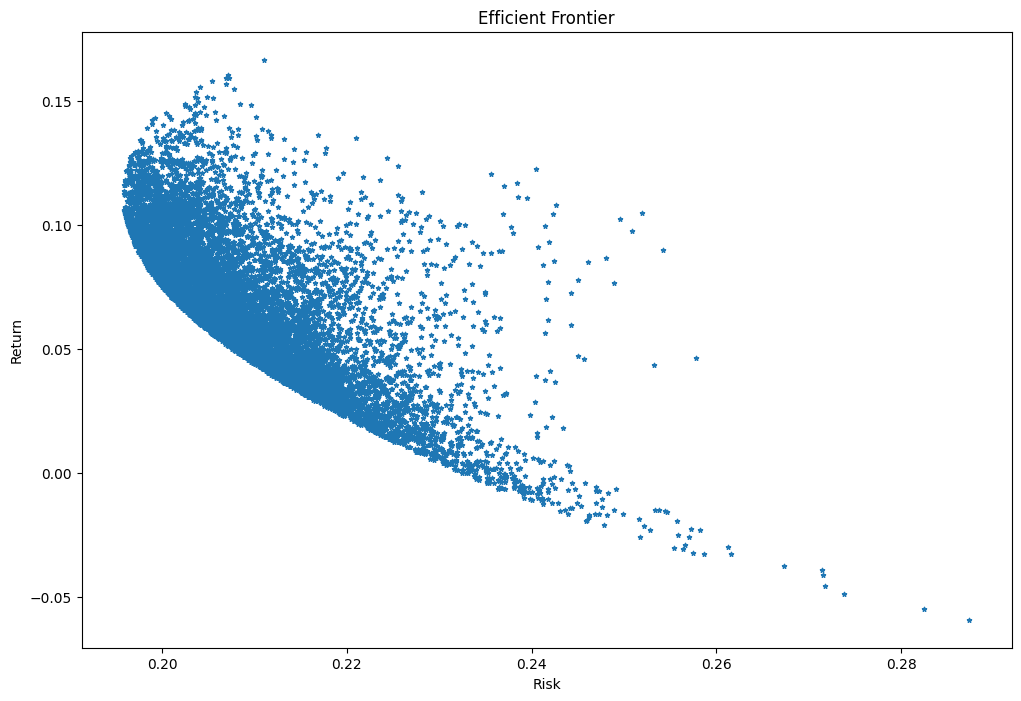

In [4]:
plt.figure(figsize=(12, 8))
plt.scatter(all_portfolios[0]["Risk"], all_portfolios[0]["Return"], marker= "*", s=10)

plt.xlabel("Risk")
plt.ylabel("Return")
plt.title("Efficient Frontier")

plt.show()

In [5]:
len(all_portfolios)

20

In [6]:
rf = 0.0432
for i in range(len(all_portfolios   )):
    all_portfolios[i]['Sharpe'] =  (all_portfolios[i]['Return'] - rf )/ all_portfolios[i]['Risk']



In [7]:
all_portfolios[0].head()

,Return,Risk,MSFT Weight,BAC Weight,V Weight,DIS Weight,Sharpe
0,0.094371,0.198777,0.293836,0.112145,0.278699,0.315320,0.257432
1,0.082155,0.228637,0.047295,0.187867,0.642090,0.122747,0.170377
2,0.120207,0.201682,0.029583,0.135058,0.301157,0.534202,0.381825
3,0.045065,0.221206,0.027128,0.421021,0.376245,0.175606,0.008433
4,0.079362,0.200558,0.240449,0.198661,0.284205,0.276685,0.180304


In [8]:
all_portfolios[0][all_portfolios[0]['Sharpe'] == all_portfolios[0]['Sharpe'].max()][['Risk']]

,Risk
4558,0.210999


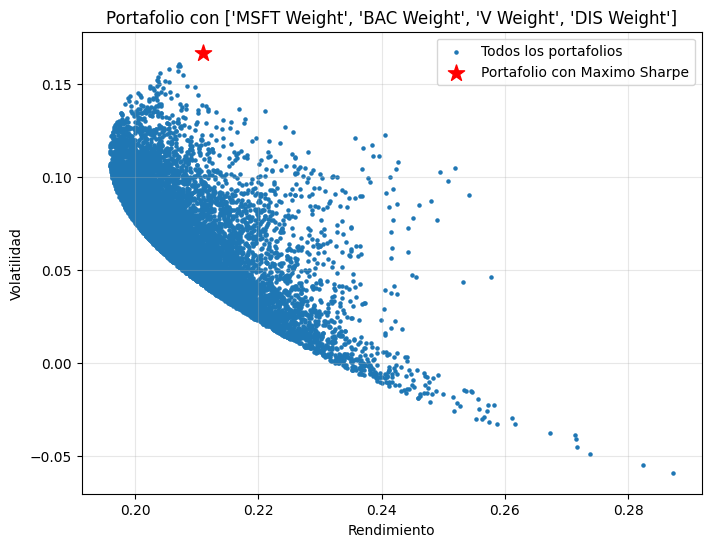

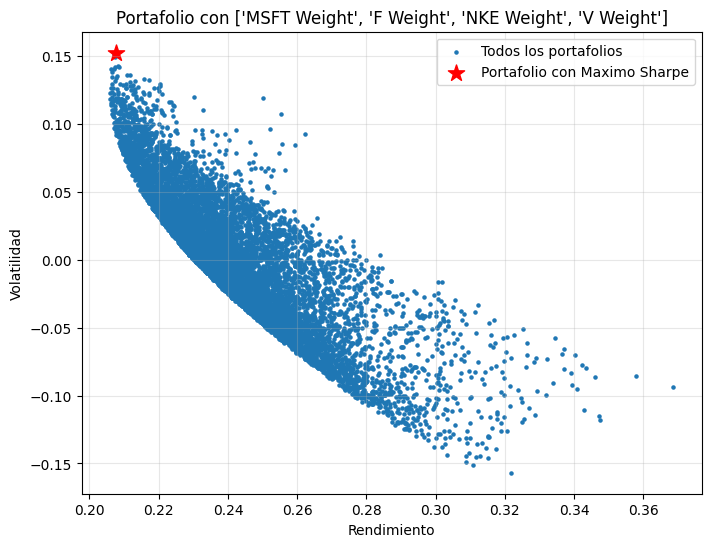

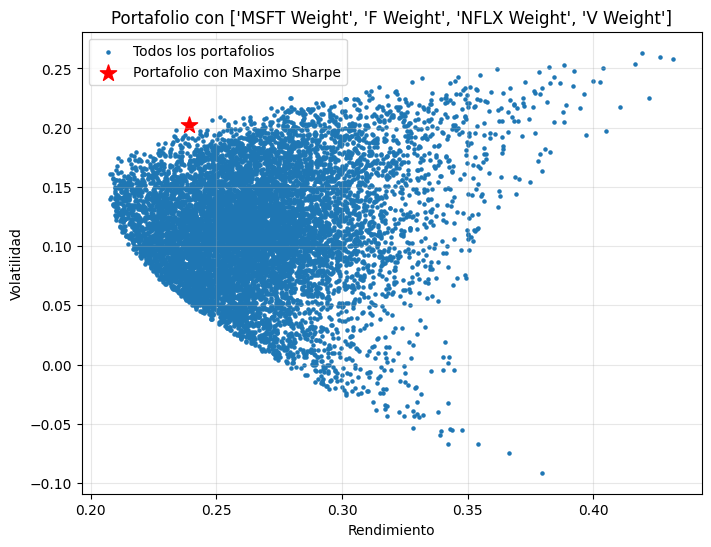

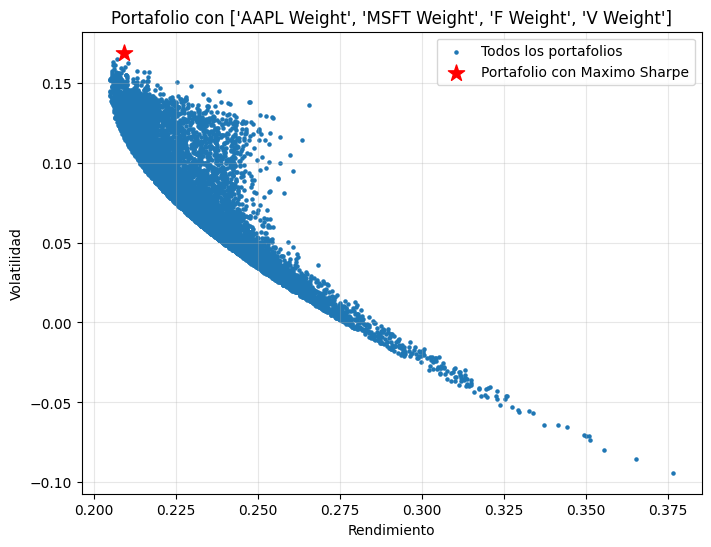

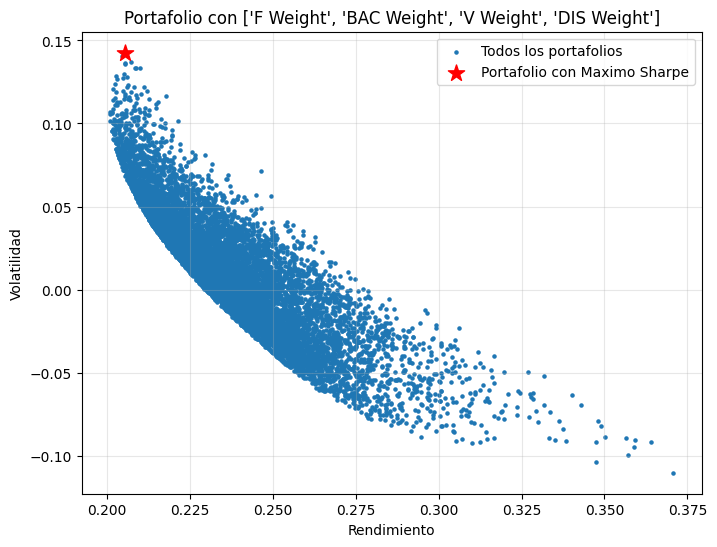

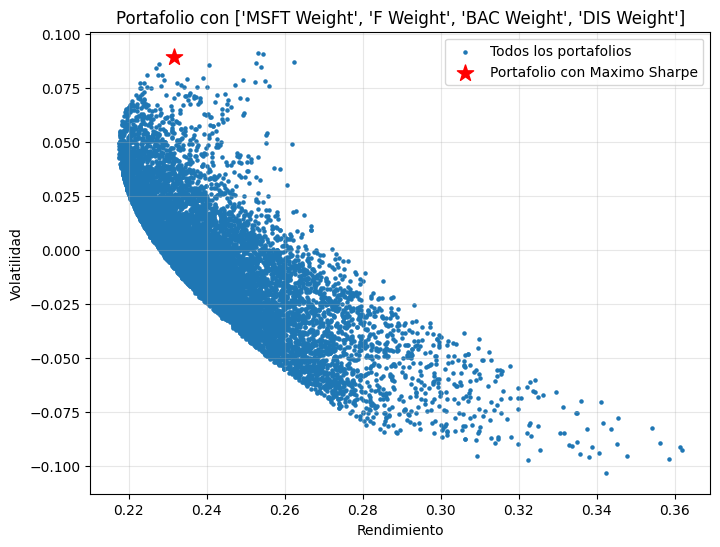

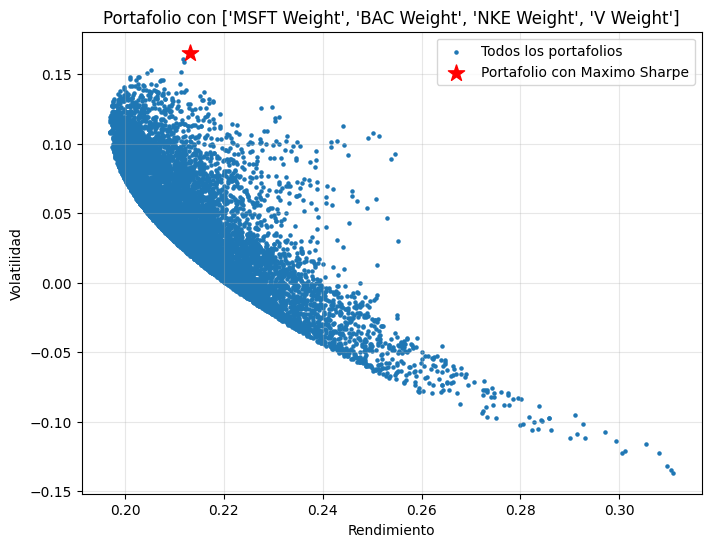

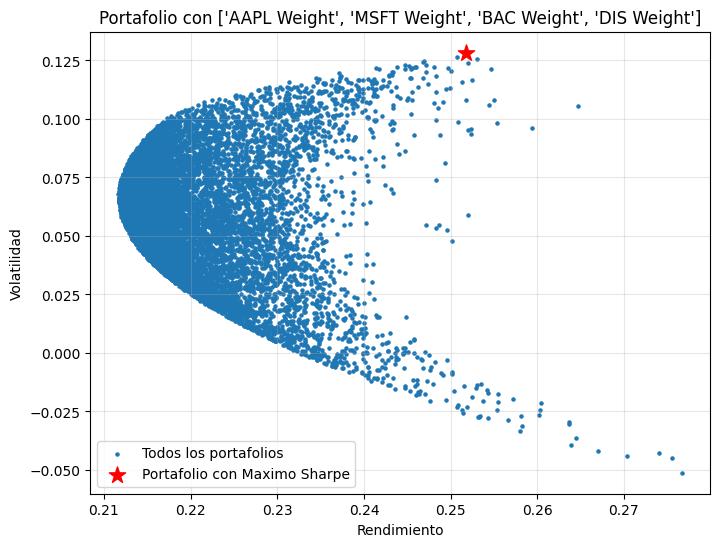

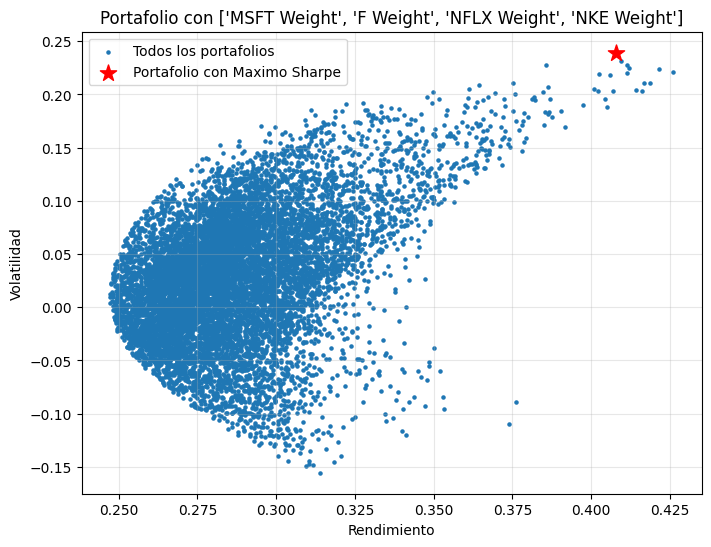

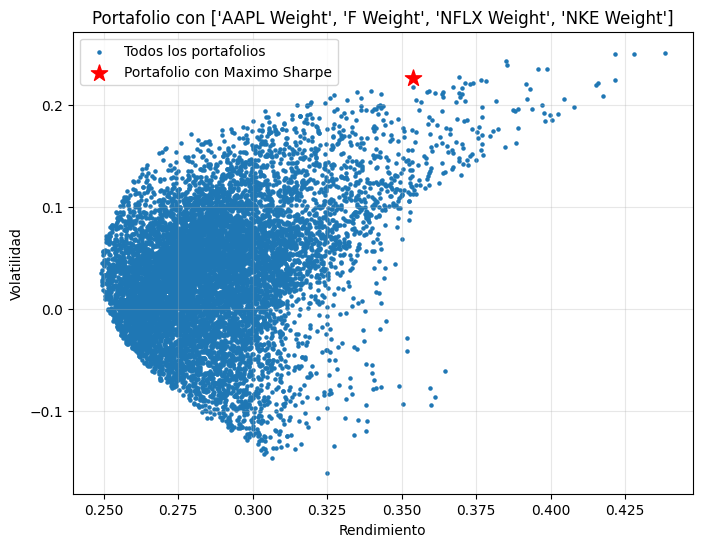

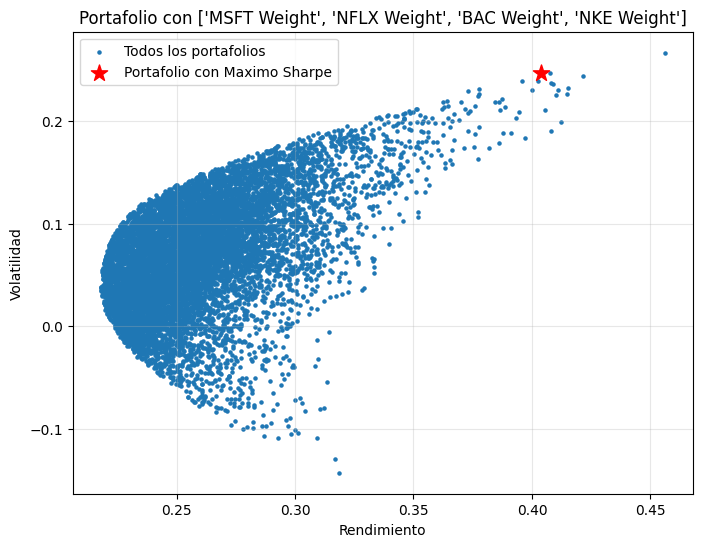

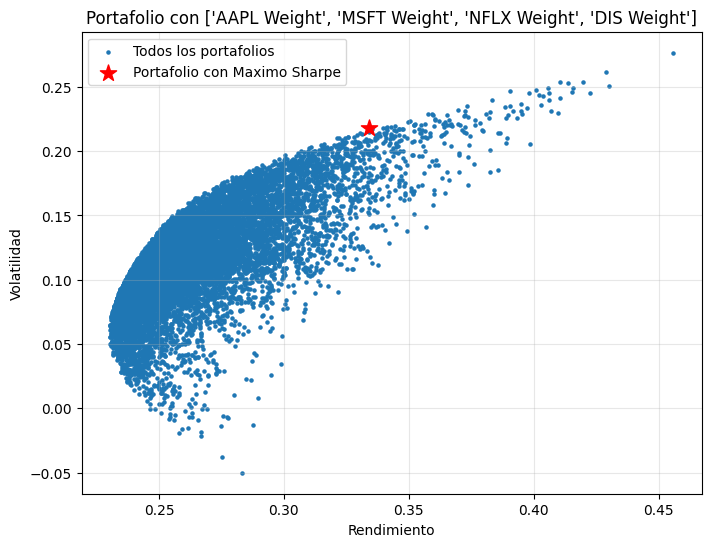

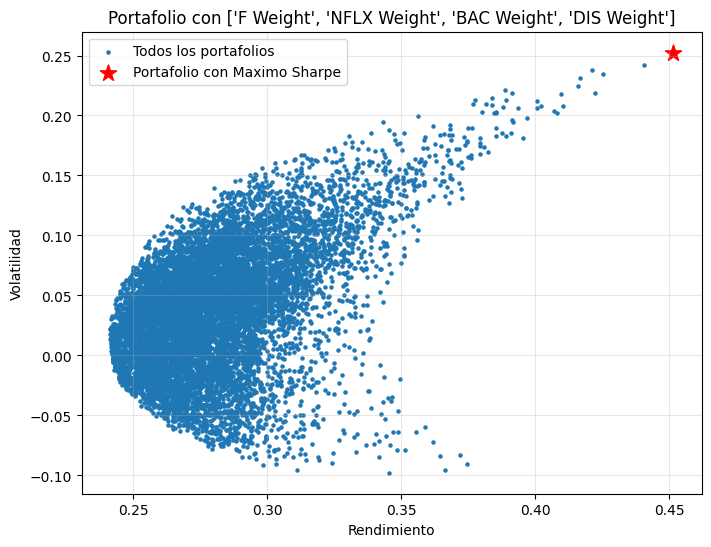

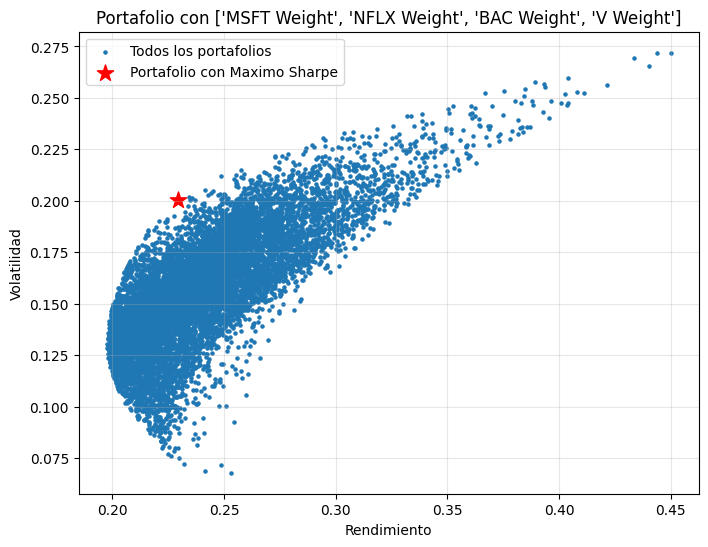

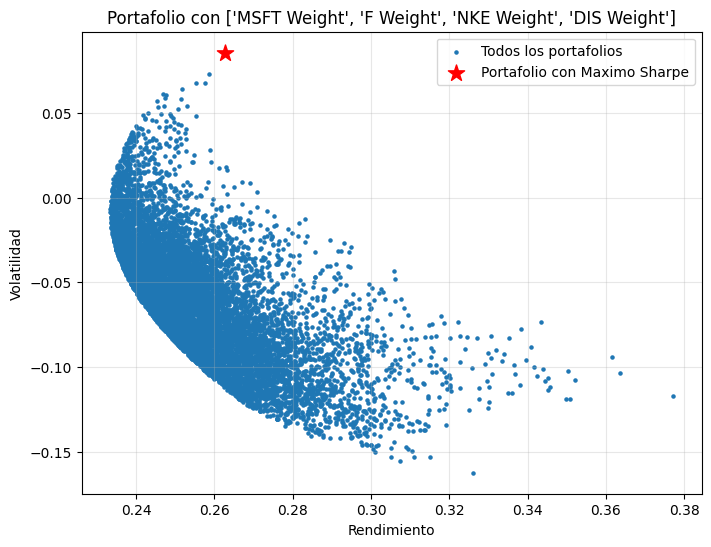

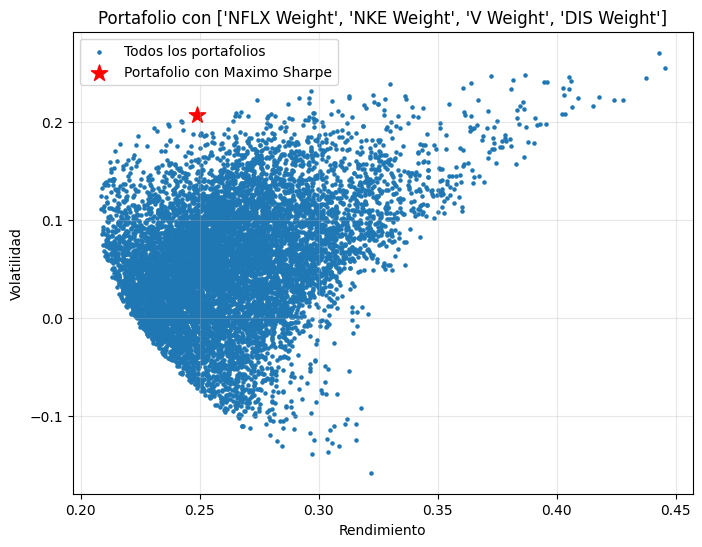

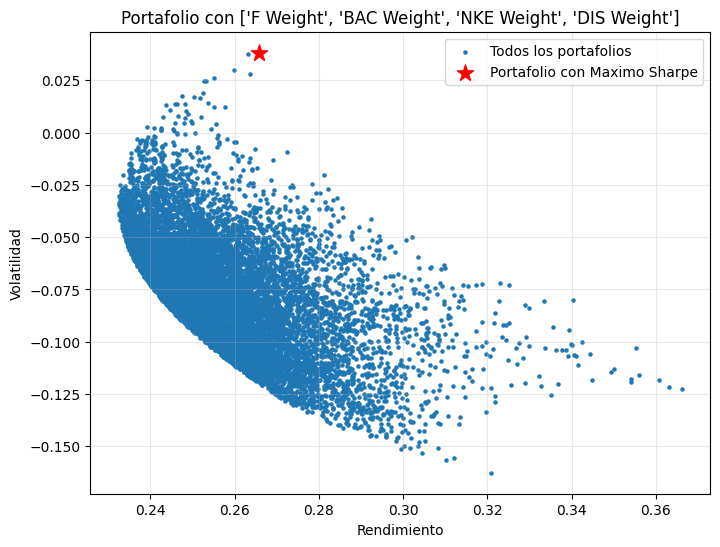

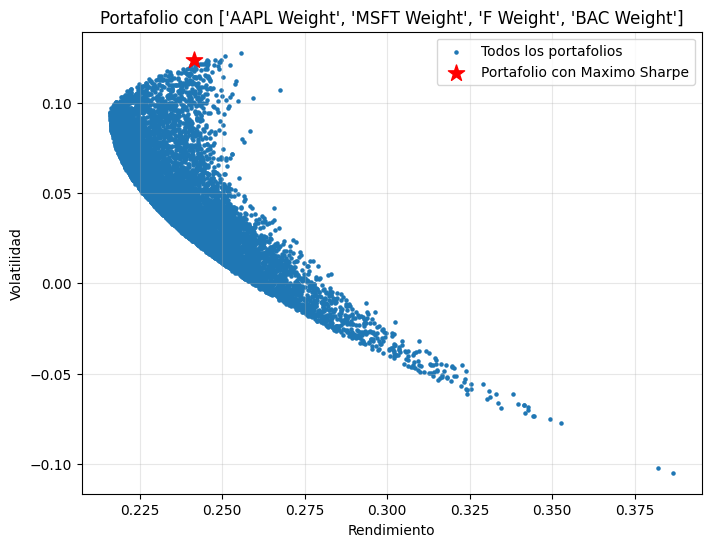

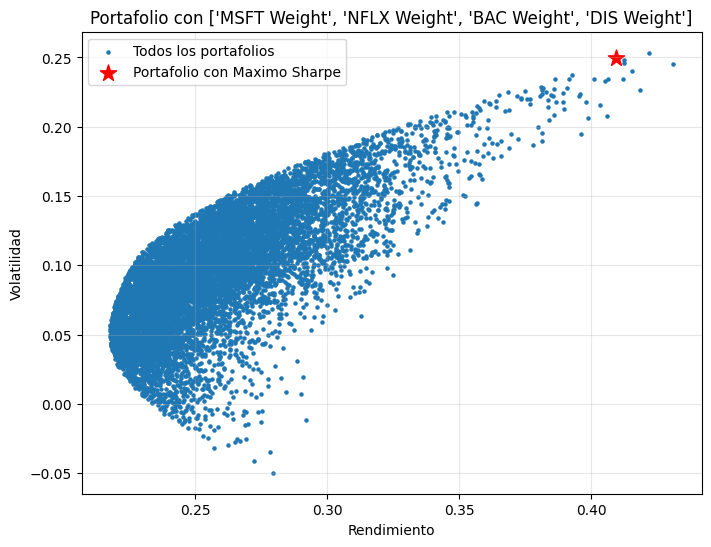

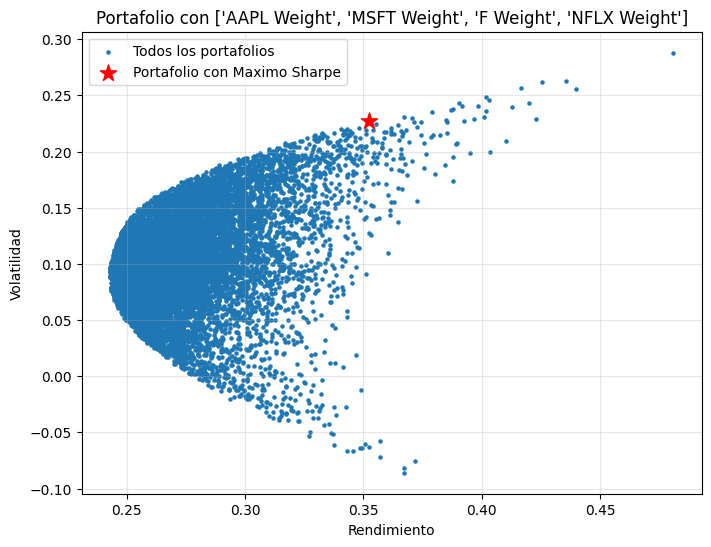

In [9]:
for i in range(len(all_portfolios)):
    plt.figure(figsize=(8,6))
    plt.scatter(all_portfolios[i]['Risk'], all_portfolios[i]['Return'], s=5, label='Todos los portafolios')
    plt.scatter(all_portfolios[i][all_portfolios[i]['Sharpe'] == all_portfolios[i]['Sharpe'].max()][['Risk']],
                all_portfolios[i][all_portfolios[i]['Sharpe'] == all_portfolios[i]['Sharpe'].max()][['Return']], 
                color='r', marker='*', s=150, label='Portafolio con Maximo Sharpe')
    plt.title(f'Portafolio con {all_portfolios[i].columns.tolist()[2:-1]}')
    plt.grid(alpha=0.3)
    plt.xlabel('Rendimiento')
    plt.ylabel('Volatilidad')
    plt.legend(loc='best')

In [10]:
all_portfolios[0][all_portfolios[0]['Sharpe'] == all_portfolios[0]['Sharpe'].max()][['Return', 'Risk']]

,Return,Risk
4558,0.166753,0.210999
